In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
!python -m pip install graphviz
import graphviz
!python -m pip install -q dtreeviz
import dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.1 MB/s eta 0:00:00


In [2]:
df = pd.read_csv("penguins.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
df = df.dropna() #usuwanie wartości NaN
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [4]:
label_encoder = LabelEncoder()
df['island'] = label_encoder.fit_transform(df['island'])
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,2,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,2,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,2,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,2,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,2,39.3,20.6,190.0,3650.0,male,2007


In [5]:
X = df.values[:, 1:6]
y = df.values[:, 0]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [6]:
clf = tree.DecisionTreeClassifier() # definicja klasyfikatora
scores = cross_val_score(clf, X, y, cv=5) # walidacja krzyżowa
print('Accuracy (mean): ', scores.mean())

Accuracy (mean):  0.9638625056535505


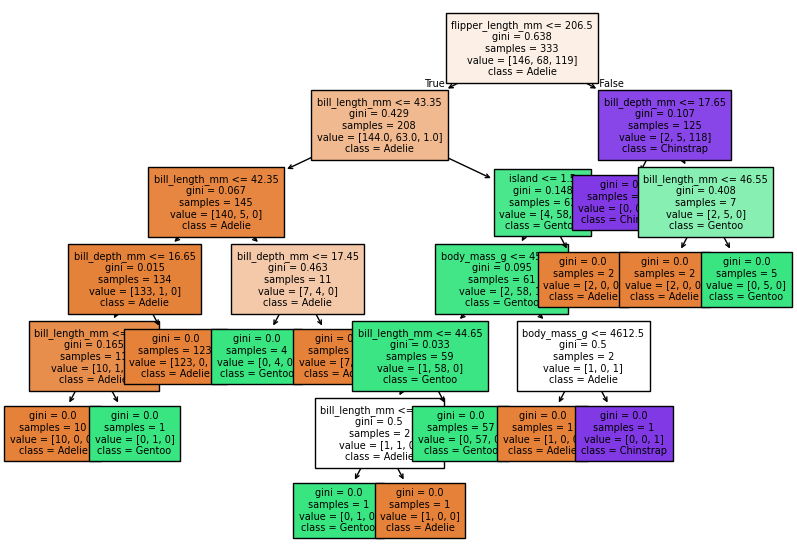

In [7]:
clf = clf.fit(X, y) # uczenie klasyfikatora
plt.figure(figsize=(10,7)) #odpowiednio dopasować: figsize, fontsize
tree.plot_tree(clf, fontsize=7, filled=True,
feature_names=df.columns[1:6], class_names=df["species"].unique())
plt.savefig('DTiris.png') #zapis do pliku
plt.show()

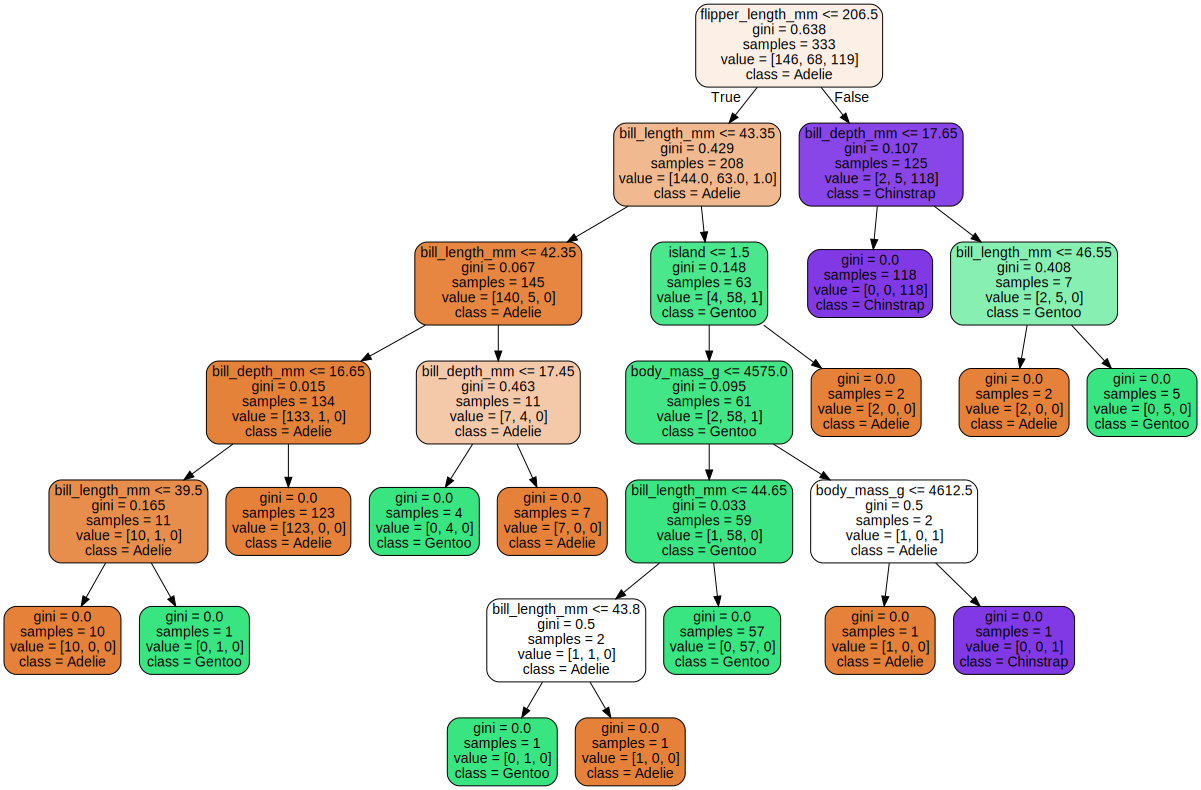

'DT.pdf'

In [9]:
dot_data = tree.export_graphviz(clf, # wyświetlenie drzewa decyzyjnego (model dla wszystkich przypadków)
 feature_names=df.columns[1:6],
class_names=df["species"].unique(),
 filled=True, rounded=True)
graph = graphviz.Source(dot_data)
display(graph) #alteranatywnie: display(graph)
graph.format = "pdf"
graph.render("DT") #zapis do pliku

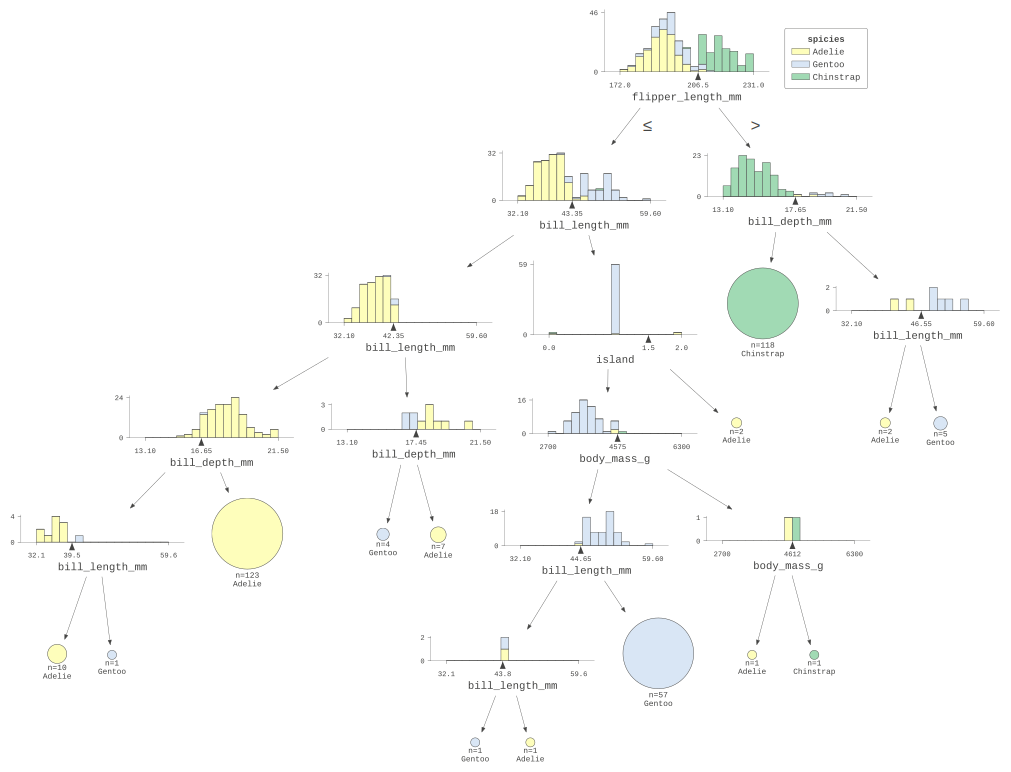

In [11]:
viz = dtreeviz.model(clf, X, y,
 target_name='spicies',
 feature_names=df.columns[1:6],
class_names=df["species"].unique())
viz.view(scale=1.2, fontname="Liberation Mono")


In [12]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import graphviz
import dtreeviz

In [13]:
pima = pd.read_csv('diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# Krótkie nazwy cech (wygodne przy wyświetlaniu drzewa)
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi',
'pedigree', 'age', 'label']
pima = pd.read_csv('diabetes.csv', header=0, names=col_names)
print(pima.head())


   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1


In [15]:
X = pima.values[:, 0:8] # cechy
y = pima.label # etykieta
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

In [30]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split= 2) # instancja klasyfikatora
clf = clf.fit(X_train,y_train) # trenowanie klasyfikatora
y_train_pred = clf.predict(X_train) # weryfikacja
print("Accuracy (train):",metrics.accuracy_score(y_train,y_train_pred))
y_test_pred = clf.predict(X_test)
print("Accuracy (test):",metrics.accuracy_score(y_test, y_test_pred))

Accuracy (train): 0.8100558659217877
Accuracy (test): 0.7662337662337663


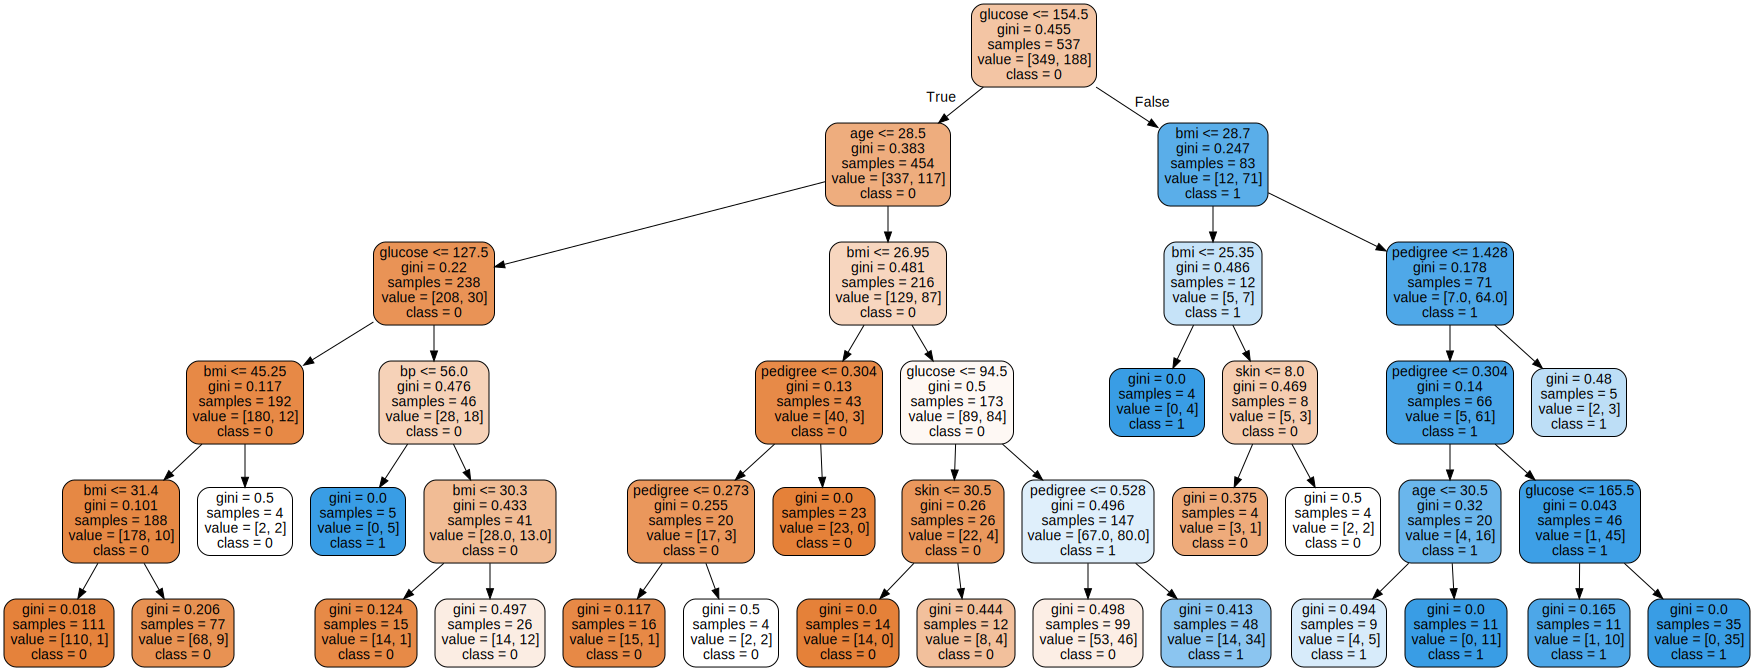

In [31]:
dot_data = tree.export_graphviz(clf,
 feature_names=col_names[:-1],
 class_names=['0','1'],
filled=True, rounded=True)
graph = graphviz.Source(dot_data, format='png')
graph.render('DTdiabetes') # do pliku DTdiabetes.png
graph